## Machine: binary classification 
## Baseball - Algorithms for Classification

url: https://scikit-learn.org/stable/index.html

### Moneyball dataset

url: https://en.wikipedia.org/wiki/Moneyball_(film)

url: https://zh.wikipedia.org/wiki/点球成金

url: https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012 

### Crash Courses
url: https://machinelearningmastery.com

url: https://www.kdnuggets.com

url: https://developers.google.com/machine-learning/crash-course

### Moneyball Features (特徵)

Variable Name Description

Team - Name of the baseball team

League - Name of the league

Year - Year

RS - Runs scored

RA - Runs allowed

W - Number of wins

OBP - On-base percentage

SLG - Sluggish percentage

BA - Batting average

Playoffs - Whether team made it to the playoffs or not

RankSeason - Rank of team in the season

RankPlayoffs - Rank of team in the playoffs

G - Games played

OOBP - Opponents On-base percentage

OSLG - Opponents Sluggish percentage

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv('baseball.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [4]:
df.columns

Index(['Team', 'League', 'Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA',
       'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG'],
      dtype='object')

In [5]:
df = df[['League', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs']]

In [6]:
df['League'].unique()

array(['NL', 'AL'], dtype=object)

In [7]:
# create dummy variable for League NL, AL 
# and drop one to avoid collinearity 

df = pd.get_dummies(df, prefix = ['League'], drop_first = True)

In [8]:
df.columns

Index(['RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs', 'League_NL'], dtype='object')

In [9]:
df = df[['RS', 'RA', 'OBP', 'SLG', 'BA', 'League_NL', 'Playoffs', 'W']]

## excluding outliers

In [10]:
from sklearn.linear_model import LinearRegression

X = df.iloc[:, : -1]

y = df.iloc[:, -1]

model = LinearRegression()

model.fit(X, y)

yHat = model.predict(X)

data = {'y': y, 'yHat': yHat}

Residual = pd.DataFrame(data)

residual = y - yHat

Residual['residual'] = residual

Residual['residual by %'] = (residual / y) * 100

Residual[50:70]

,y,yHat,residual,residual by %
50,102,101.492045,0.507955,0.497995
51,72,70.469642,1.530358,2.125497
52,71,78.594220,-7.594220,-10.696085
53,67,68.543705,-1.543705,-2.304037
54,86,79.974317,6.025683,7.006608
55,90,90.595117,-0.595117,-0.661242
56,91,92.762186,-1.762186,-1.936468
57,96,100.565703,-4.565703,-4.755941
58,81,78.217946,2.782054,3.434634
59,80,78.765111,1.234889,1.543612


<AxesSubplot:xlabel='residual by %'>

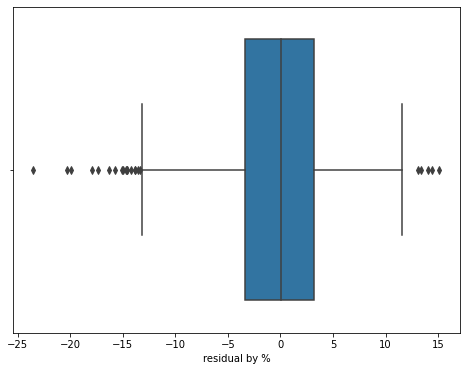

In [11]:
plt.figure(figsize = (8, 6))

sb.boxplot(x = Residual['residual by %'])

In [12]:
q1, q2, q3 = np.percentile(Residual['residual by %'], [25, 50, 75])

print(q1, q2, q3)
print()

iqr = q3 - q1

print(iqr)
print()

lower_bound = q1 - (1.5 * iqr) 

upper_bound = q3 + (1.5 * iqr) 

print(lower_bound, upper_bound)

-3.3431665003446414 0.03975478274770117 3.2301994783967607

6.573365978741402

-13.203215468456744 13.090248446508864


In [13]:
lower_bound1 = q1 - (1.5 * iqr) 

upper_bound1 = q3 + (1.5 * iqr) 

In [14]:
Residual[Residual['residual by %'] >= upper_bound]

,y,yHat,residual,residual by %
210,77,65.360971,11.639029,15.115623
247,76,65.063291,10.936709,14.390407
433,72,61.920315,10.079685,13.999563
757,90,77.969565,12.030435,13.367150
992,60,52.131060,7.868940,13.114900


In [15]:
ub_index = Residual[Residual['residual by %'] >= upper_bound].index

ub_index

Int64Index([210, 247, 433, 757, 992], dtype='int64')

In [16]:
Residual[Residual['residual by %'] <= lower_bound]

,y,yHat,residual,residual by %
187,78,88.784717,-10.784717,-13.826561
403,64,73.403811,-9.403811,-14.693455
523,59,72.867933,-13.867933,-23.504971
528,61,70.925030,-9.925030,-16.270541
545,63,72.188833,-9.188833,-14.585450
638,54,62.068499,-8.068499,-14.941664
709,64,76.784339,-12.784339,-19.975530
735,57,66.895610,-9.895610,-17.360720
761,75,85.018226,-10.018226,-13.357634
800,61,69.465118,-8.465118,-13.877242


In [17]:
lb_index = Residual[Residual['residual by %'] <= lower_bound].index

lb_index

Int64Index([ 187,  403,  523,  528,  545,  638,  709,  735,  761,  800,  913,
             957, 1081, 1113, 1146, 1225, 1231],
           dtype='int64')

In [18]:
df_out1 = df.drop(ub_index, axis = 0)

print(len(df_out1))

1227


In [19]:
df_out2 = df_out1.drop(lb_index, axis = 0)

print(len(df_out2))

1210


In [20]:
print(len(df))
print()
print(len(df) - len(df_out2))

1232

22


X = df_out2.drop('Playoffs', axis=1)

y = df_out2['Playoffs']

### using df_out2

In [21]:
df_out2.columns

Index(['RS', 'RA', 'OBP', 'SLG', 'BA', 'League_NL', 'Playoffs', 'W'], dtype='object')

In [22]:
df_out2 = df_out2[['RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'League_NL', 'Playoffs']]

df_out2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210 entries, 0 to 1230
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RS         1210 non-null   int64  
 1   RA         1210 non-null   int64  
 2   W          1210 non-null   int64  
 3   OBP        1210 non-null   float64
 4   SLG        1210 non-null   float64
 5   BA         1210 non-null   float64
 6   League_NL  1210 non-null   uint8  
 7   Playoffs   1210 non-null   int64  
dtypes: float64(3), int64(4), uint8(1)
memory usage: 76.8 KB


In [23]:
df_out2.head()

,RS,RA,W,OBP,SLG,BA,League_NL,Playoffs
0,734,688,81,0.328,0.418,0.259,1,0
1,700,600,94,0.320,0.389,0.247,1,1
2,712,705,93,0.311,0.417,0.247,0,1
3,734,806,69,0.315,0.415,0.260,0,0
4,613,759,61,0.302,0.378,0.240,1,0


In [24]:
# features, independent variable

X = df_out2.iloc[:, : -1]

# labels, dependent variable 

y = df_out2.iloc[:, -1]

### train test split at random_state = 2021

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

In [26]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()  

X_train = SS.fit_transform(X_train)  

X_test = SS.transform(X_test)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

# for L1 Lasso

lg_model = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lg_model.fit(X_train, y_train)

yHat_test1 = lg_model.predict(X_test)

In [28]:
# for L2 Ridge

lg_model = LogisticRegression(penalty = 'l2', solver = 'lbfgs')

lg_model.fit(X_train, y_train)

yHat_test2 = lg_model.predict(X_test)

In [29]:
# for L1 Lasso

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(confusion_matrix(y_test, yHat_test1))

[[231   7]
 [ 14  51]]


In [30]:
# for L2 Ridge

print(confusion_matrix(y_test, yHat_test2))

[[231   7]
 [ 17  48]]


In [31]:
# for L1 Lasso

print(classification_report(y_test, yHat_test1, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9429    0.9706    0.9565       238
           1     0.8793    0.7846    0.8293        65

    accuracy                         0.9307       303
   macro avg     0.9111    0.8776    0.8929       303
weighted avg     0.9292    0.9307    0.9292       303



In [32]:
# for L2 Ridge

print(classification_report(y_test, yHat_test2, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9315    0.9706    0.9506       238
           1     0.8727    0.7385    0.8000        65

    accuracy                         0.9208       303
   macro avg     0.9021    0.8545    0.8753       303
weighted avg     0.9189    0.9208    0.9183       303



### K nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train,y_train)

yHat_test3 = knn.predict(X_test)

In [34]:
print(confusion_matrix(y_test, yHat_test3))

[[230   8]
 [ 16  49]]


In [35]:
print(classification_report(y_test, yHat_test3, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9350    0.9664    0.9504       238
           1     0.8596    0.7538    0.8033        65

    accuracy                         0.9208       303
   macro avg     0.8973    0.8601    0.8768       303
weighted avg     0.9188    0.9208    0.9188       303



### Decision Tree

In [36]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, 
                                         random_state = 2021)

tree_model.fit(X_train, y_train)

yHat_test4 = tree_model.predict(X_test)

In [37]:
print(confusion_matrix(y_test, yHat_test4))

[[226  12]
 [ 11  54]]


In [38]:
print(classification_report(y_test, yHat_test4, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9536    0.9496    0.9516       238
           1     0.8182    0.8308    0.8244        65

    accuracy                         0.9241       303
   macro avg     0.8859    0.8902    0.8880       303
weighted avg     0.9245    0.9241    0.9243       303



In [39]:
tree_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 5, 
                                         random_state = 2021)

tree_model.fit(X_train, y_train)

yHat_test5 = tree_model.predict(X_test)

In [40]:
print(confusion_matrix(y_test, yHat_test5))

[[228  10]
 [ 26  39]]


In [41]:
print(classification_report(y_test, yHat_test5, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.8976    0.9580    0.9268       238
           1     0.7959    0.6000    0.6842        65

    accuracy                         0.8812       303
   macro avg     0.8468    0.7790    0.8055       303
weighted avg     0.8758    0.8812    0.8748       303



### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                  random_state = 2021)

rf_model.fit(X_train, y_train)

yHat_test6 = rf_model.predict(X_test)

In [43]:
print(confusion_matrix(y_test, yHat_test6))

[[233   5]
 [ 19  46]]


In [44]:
print(classification_report(y_test, yHat_test6, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9246    0.9790    0.9510       238
           1     0.9020    0.7077    0.7931        65

    accuracy                         0.9208       303
   macro avg     0.9133    0.8433    0.8721       303
weighted avg     0.9197    0.9208    0.9171       303



In [45]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'gini', 
                                  random_state = 2021)

rf_model.fit(X_train, y_train)

yHat_test7 = rf_model.predict(X_test)

In [46]:
print(confusion_matrix(y_test, yHat_test7))

[[227  11]
 [ 22  43]]


In [47]:
print(classification_report(y_test, yHat_test7, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9116    0.9538    0.9322       238
           1     0.7963    0.6615    0.7227        65

    accuracy                         0.8911       303
   macro avg     0.8540    0.8077    0.8275       303
weighted avg     0.8869    0.8911    0.8873       303



### Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

yHat_test8 = gnb.predict(X_test)

In [49]:
print(confusion_matrix(y_test, yHat_test8))

[[216  22]
 [ 11  54]]


In [50]:
print(classification_report(y_test, yHat_test8, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9515    0.9076    0.9290       238
           1     0.7105    0.8308    0.7660        65

    accuracy                         0.8911       303
   macro avg     0.8310    0.8692    0.8475       303
weighted avg     0.8998    0.8911    0.8940       303



### Support Vector Machine

In [51]:
from sklearn.svm import SVC

svc_model = SVC(kernel = 'linear', random_state = 2021)

svc_model.fit(X_train, y_train)

yHat_test9 = svc_model.predict(X_test)

In [52]:
print(confusion_matrix(y_test, yHat_test9))

[[231   7]
 [ 16  49]]


In [53]:
print(classification_report(y_test, yHat_test9, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9352    0.9706    0.9526       238
           1     0.8750    0.7538    0.8099        65

    accuracy                         0.9241       303
   macro avg     0.9051    0.8622    0.8812       303
weighted avg     0.9223    0.9241    0.9220       303



### Gaussian Process

In [54]:
from sklearn.gaussian_process import GaussianProcessClassifier

gp = GaussianProcessClassifier()

gp.fit(X_train, y_train)

yHat_test10 = gp.predict(X_test)

In [55]:
print(confusion_matrix(y_test, yHat_test10))

[[231   7]
 [ 19  46]]


In [56]:
print(classification_report(y_test, yHat_test10, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9240    0.9706    0.9467       238
           1     0.8679    0.7077    0.7797        65

    accuracy                         0.9142       303
   macro avg     0.8960    0.8391    0.8632       303
weighted avg     0.9120    0.9142    0.9109       303



### Extreme Gradient Boosting (XGBoost) 

### sudo pip install xgboost

### brew install libomp

In [57]:
import xgboost

print(xgboost.__version__)

1.2.1


In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

yHat_test11 = xgb.predict(X_test)

In [59]:
print(confusion_matrix(y_test, yHat_test11))

[[226  12]
 [ 17  48]]


In [60]:
print(classification_report(y_test, yHat_test11, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9300    0.9496    0.9397       238
           1     0.8000    0.7385    0.7680        65

    accuracy                         0.9043       303
   macro avg     0.8650    0.8440    0.8539       303
weighted avg     0.9021    0.9043    0.9029       303



### Linear Discriminant Analysis (LDA) 

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

yHat_test12 = lda.predict(X_test)

In [62]:
print(confusion_matrix(y_test, yHat_test12))

[[233   5]
 [ 21  44]]


In [63]:
print(classification_report(y_test, yHat_test12, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9173    0.9790    0.9472       238
           1     0.8980    0.6769    0.7719        65

    accuracy                         0.9142       303
   macro avg     0.9076    0.8280    0.8595       303
weighted avg     0.9132    0.9142    0.9096       303



### K Means (unsupervised)

In [64]:
from sklearn.cluster import KMeans 

km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, 
            random_state = 2021)

X = df_out2.iloc[:, : -1].values

y = df_out2.iloc[:, -1].values

X_reduced = km.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 1/4, 
                                                    random_state = 2021)

X_train = SS.fit_transform(X_train)  

X_test = SS.transform(X_test)

# using Support Vector Machine

svc_model.fit(X_train, y_train)

yHat_test13 = svc_model.predict(X_test)

In [65]:
print(confusion_matrix(y_test, yHat_test13))

[[238   0]
 [ 65   0]]


In [66]:
print(classification_report(y_test, yHat_test13, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.7855    1.0000    0.8799       238
           1     0.0000    0.0000    0.0000        65

    accuracy                         0.7855       303
   macro avg     0.3927    0.5000    0.4399       303
weighted avg     0.6170    0.7855    0.6911       303



### Principal Component Analysis (PCA)

In [67]:
# unsupervised learning

X = df_out2.iloc[:, : -1].values

y = df_out2.iloc[:, -1].values

from sklearn.decomposition import PCA

pca_model = PCA(n_components = 2)

X_reduced = pca_model.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 1/4, 
                                                    random_state = 2021)

X_train = SS.fit_transform(X_train)  

X_test = SS.transform(X_test)

# using Support Vector Machine

svc_model.fit(X_train, y_train)

yHat_test14 = svc_model.predict(X_test)

In [68]:
print(confusion_matrix(y_test, yHat_test14))

[[228  10]
 [ 25  40]]


In [69]:
print(classification_report(y_test, yHat_test14, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9012    0.9580    0.9287       238
           1     0.8000    0.6154    0.6957        65

    accuracy                         0.8845       303
   macro avg     0.8506    0.7867    0.8122       303
weighted avg     0.8795    0.8845    0.8787       303



### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [70]:
# unsupervised learning

X = df_out2.iloc[:, : -1].values

y = df_out2.iloc[:, -1].values

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 50)

X_reduced = tsne.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 1/4, 
                                                    random_state = 2021)

X_train = SS.fit_transform(X_train)  

X_test = SS.transform(X_test)

# using Support Vector Machine

svc_model.fit(X_train, y_train)

yHat_test15 = svc_model.predict(X_test)

In [71]:
print(confusion_matrix(y_test, yHat_test15))

[[228  10]
 [ 32  33]]


In [72]:
print(classification_report(y_test, yHat_test15, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.8769    0.9580    0.9157       238
           1     0.7674    0.5077    0.6111        65

    accuracy                         0.8614       303
   macro avg     0.8222    0.7328    0.7634       303
weighted avg     0.8534    0.8614    0.8503       303



### Gaussian Mixture Models 

url: https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e

In [73]:
# unsupervised learning

X = df_out2.iloc[:, : -1].values

y = df_out2.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

X_train = SS.fit_transform(X_train)  

X_test = SS.transform(X_test)

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 2, covariance_type = 'full')

gm.fit(X_train)

yHat_test16 = gm.predict(X_test)

In [74]:
print(confusion_matrix(y_test, yHat_test16))

[[118 120]
 [ 37  28]]


In [75]:
print(classification_report(y_test, yHat_test16, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.7613    0.4958    0.6005       238
           1     0.1892    0.4308    0.2629        65

    accuracy                         0.4818       303
   macro avg     0.4752    0.4633    0.4317       303
weighted avg     0.6386    0.4818    0.5281       303



### Keras Neural Network

In [76]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

X = df_out2.iloc[:, : -1]

y = df_out2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

X_train = SS.fit_transform(X_train)  

X_test = SS.transform(X_test)

y_train_ = to_categorical(y_train)

y_test_ = to_categorical(y_test)

keras_model = Sequential()

keras_model.add(Dense(16, input_shape = (7,), activation = 'relu'))

keras_model.add(Dense(8, activation = 'relu'))

keras_model.add(Dense(2, activation = 'sigmoid'))

keras_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', 
                    metrics = ['accuracy'])

keras_model.fit(X_train, y_train_, validation_data = (X_test, y_test_), 
                epochs = 1000, batch_size = 100)

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 907 samples, validate on 303 samples
Epoch 1/1000





907/907 [==============================] - 1s 1ms/step - loss: 0.7374 - acc: 0.5033 - val_loss: 0.7148 - val_acc: 0.5380
Epoch 2/1000
907/907 [==============================] - 0s 40us/step - loss: 0.6991 - acc: 0.5639 - val_loss: 0.6835 - val_acc: 0.5858
Epoch 3/1000
907/907 [==============================] - 0s 42us/step - loss: 0.6706 - acc: 0.6103 - val_loss: 0.6613 - val_acc: 0.6287
Epoch 4/1000
907/907 [==============================] - 0s 52us/step - loss: 0.6495 - acc: 0.6544 - val_loss: 0.6447 - val_acc: 0.6617
Epoch 5/1000
907/907 [==============================] - 0s 53us/step - loss: 0.6330 - acc: 0.6880 - val_loss: 0.6310 - val_acc: 0.6898
Epoch 6/1000
907/907 [==============================] - 0s 66us/step - loss: 0.6182 - acc: 0.7056 - val_loss: 0.6171 - val_acc: 0.6898
Epoch 7/1000
907/907 [================

In [77]:
pred_y_proba = keras_model.predict(X_test)

print(pred_y_proba[100:110])
print()

yHat_classes = keras_model.predict_classes(X_test)

table = pd.crosstab(y_test, yHat_classes, rownames = ['Label'], 
                    colnames = ['Prediction'])

print(table)

[[9.9996328e-01 6.2584877e-05]
 [9.9077070e-01 1.1259913e-02]
 [9.9993467e-01 5.6862831e-05]
 [9.9999994e-01 5.9604645e-08]
 [5.3571534e-01 4.1152531e-01]
 [1.0000000e+00 2.9802322e-08]
 [7.7909380e-01 1.9695976e-01]
 [7.9352343e-01 1.5637791e-01]
 [7.5107813e-04 9.9927938e-01]
 [9.9421334e-01 9.0101957e-03]]

Prediction    0   1
Label              
0           228  10
1            21  44


In [78]:
print(confusion_matrix(y_test, yHat_classes))

[[228  10]
 [ 21  44]]


In [79]:
print(classification_report(y_test, yHat_classes, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9157    0.9580    0.9363       238
           1     0.8148    0.6769    0.7395        65

    accuracy                         0.8977       303
   macro avg     0.8652    0.8175    0.8379       303
weighted avg     0.8940    0.8977    0.8941       303



In [80]:
# Compute DBSCAN

from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 2, min_samples = 10).fit(X_test)

yHat_test17 = db.labels_

In [81]:
print(confusion_matrix(y_test, yHat_test17))

[[  0   0   0]
 [  2 109 127]
 [  0  28  37]]


In [82]:
print(classification_report(y_test, yHat_test17, labels = [-1, 0, 1], digits = 4))

              precision    recall  f1-score   support

          -1     0.0000    0.0000    0.0000         0
           0     0.7956    0.4580    0.5813       238
           1     0.2256    0.5692    0.3231        65

    accuracy                         0.4818       303
   macro avg     0.3404    0.3424    0.3015       303
weighted avg     0.6733    0.4818    0.5259       303



### Ada Boosting

In [83]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

yHat_test18 = ada.predict(X_test)

In [84]:
print(confusion_matrix(y_test, yHat_test18))

[[225  13]
 [ 13  52]]


In [85]:
print(classification_report(y_test, yHat_test18, labels = [0, 1], digits = 4))

              precision    recall  f1-score   support

           0     0.9454    0.9454    0.9454       238
           1     0.8000    0.8000    0.8000        65

    accuracy                         0.9142       303
   macro avg     0.8727    0.8727    0.8727       303
weighted avg     0.9142    0.9142    0.9142       303



In [87]:
print("Logistic Lasso: \n", confusion_matrix(y_test, yHat_test1))
print()
print("Logistic Ridge: \n", confusion_matrix(y_test, yHat_test2))
print()
print("K Nearest Neighbors: \n", confusion_matrix(y_test, yHat_test3))
print()
print("Decision Tree Entropy: \n", confusion_matrix(y_test, yHat_test4))
print()
print("Decision Tree Gini: \n", confusion_matrix(y_test, yHat_test5))
print()
print("Random Forest Entropy: \n", confusion_matrix(y_test, yHat_test6))
print()
print("Random Forest Gini: \n", confusion_matrix(y_test, yHat_test7))
print()
print("Gaussian Naive Bayes: \n", confusion_matrix(y_test, yHat_test8))
print()
print("Support Vector Machine: \n", confusion_matrix(y_test, yHat_test9))
print()
print("Gaussian Process: \n", confusion_matrix(y_test, yHat_test10))
print()
print("XGBoost: \n", confusion_matrix(y_test, yHat_test11))
print()
print("LDA: \n", confusion_matrix(y_test, yHat_test12))
print()
print("K Means: \n", confusion_matrix(y_test, yHat_test13))
print()
print("PCA: \n", confusion_matrix(y_test, yHat_test14))
print()
print("TSNE: \n", confusion_matrix(y_test, yHat_test15))
print()
print("GMM: \n", confusion_matrix(y_test, yHat_test16))
print()
print("Keras Neural Network: \n", confusion_matrix(y_test, yHat_classes))
print()
print("DBSCAN: \n", confusion_matrix(y_test, yHat_test17))
print()
print("Ada Boost: \n", confusion_matrix(y_test, yHat_test18))

Logistic Lasso: 
 [[231   7]
 [ 14  51]]

Logistic Ridge: 
 [[231   7]
 [ 17  48]]

K Nearest Neighbors: 
 [[230   8]
 [ 16  49]]

Decision Tree Entropy: 
 [[226  12]
 [ 11  54]]

Decision Tree Gini: 
 [[228  10]
 [ 26  39]]

Random Forest Entropy: 
 [[233   5]
 [ 19  46]]

Random Forest Gini: 
 [[227  11]
 [ 22  43]]

Gaussian Naive Bayes: 
 [[216  22]
 [ 11  54]]

Support Vector Machine: 
 [[231   7]
 [ 16  49]]

Gaussian Process: 
 [[231   7]
 [ 19  46]]

XGBoost: 
 [[226  12]
 [ 17  48]]

LDA: 
 [[233   5]
 [ 21  44]]

K Means: 
 [[238   0]
 [ 65   0]]

PCA: 
 [[228  10]
 [ 25  40]]

TSNE: 
 [[228  10]
 [ 32  33]]

GMM: 
 [[118 120]
 [ 37  28]]

Keras Neural Network: 
 [[228  10]
 [ 21  44]]

DBSCAN: 
 [[  0   0   0]
 [  2 109 127]
 [  0  28  37]]

Ada Boost: 
 [[225  13]
 [ 13  52]]


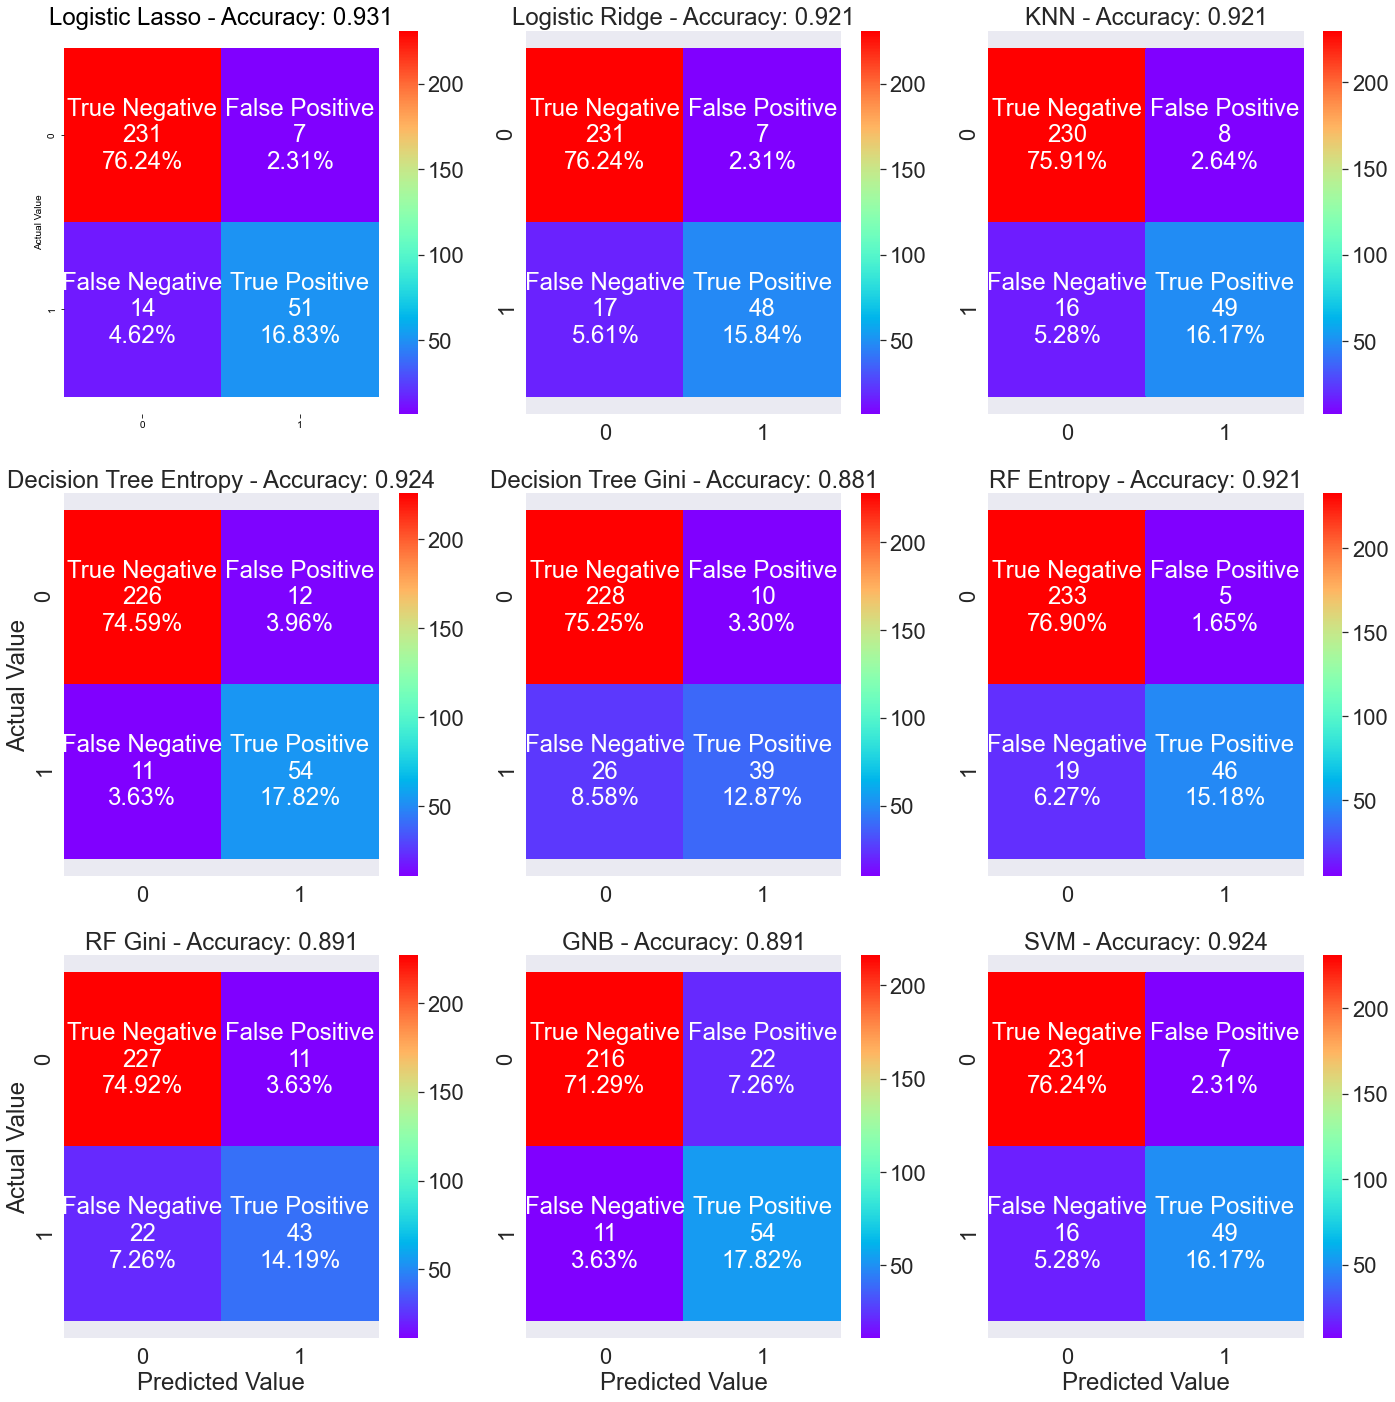

In [88]:
plt.figure(figsize = (20, 20))

plt.subplot(331)

cm_test1 = confusion_matrix(y_test, yHat_test1)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test1.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test1.flatten()/np.sum(cm_test1)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test1, annot = labels, fmt = "", cmap = "rainbow") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("Logistic Lasso - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test1)))
#plt.xlabel('Predicted Value')               
plt.ylabel('Actual Value')

plt.subplot(332)

cm_test2 = confusion_matrix(y_test, yHat_test2)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test2.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test2.flatten()/np.sum(cm_test2)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test2, annot = labels, fmt = "", cmap = "rainbow") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("Logistic Ridge - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test2)))
#plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(333)

cm_test3 = confusion_matrix(y_test, yHat_test3)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test3.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test3.flatten()/np.sum(cm_test3)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test3, annot = labels, fmt = "", cmap = "rainbow") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("KNN - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test3)))
#plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(334)

cm_test4 = confusion_matrix(y_test, yHat_test4)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test4.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test4.flatten()/np.sum(cm_test4)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test4, annot = labels, fmt = "", cmap = "rainbow") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("Decision Tree Entropy - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test4)))
#plt.xlabel('Predicted Value')               
plt.ylabel('Actual Value')

plt.subplot(335)

cm_test5 = confusion_matrix(y_test, yHat_test5)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test5.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test5.flatten()/np.sum(cm_test5)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test5, annot = labels, fmt = "", cmap = "rainbow") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("Decision Tree Gini - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test5)))
#plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(336)

cm_test6 = confusion_matrix(y_test, yHat_test6)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test6.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test6.flatten()/np.sum(cm_test6)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test6, annot = labels, fmt = "", cmap = "rainbow")  
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("RF Entropy - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test6)))
#plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(337)

cm_test7 = confusion_matrix(y_test, yHat_test7)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test7.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test7.flatten()/np.sum(cm_test7)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test7, annot = labels, fmt = "", cmap = "rainbow") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("RF Gini - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test7)))
plt.xlabel('Predicted Value')               
plt.ylabel('Actual Value')

plt.subplot(338)

cm_test8 = confusion_matrix(y_test, yHat_test8)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test8.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test8.flatten()/np.sum(cm_test8)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test8, annot = labels, fmt = "", cmap = "rainbow") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("GNB - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test8)))
plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(339)

cm_test9 = confusion_matrix(y_test, yHat_test9)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test9.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test9.flatten()/np.sum(cm_test9)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test9, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("SVM - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test9)))
plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.tight_layout()
plt.show()

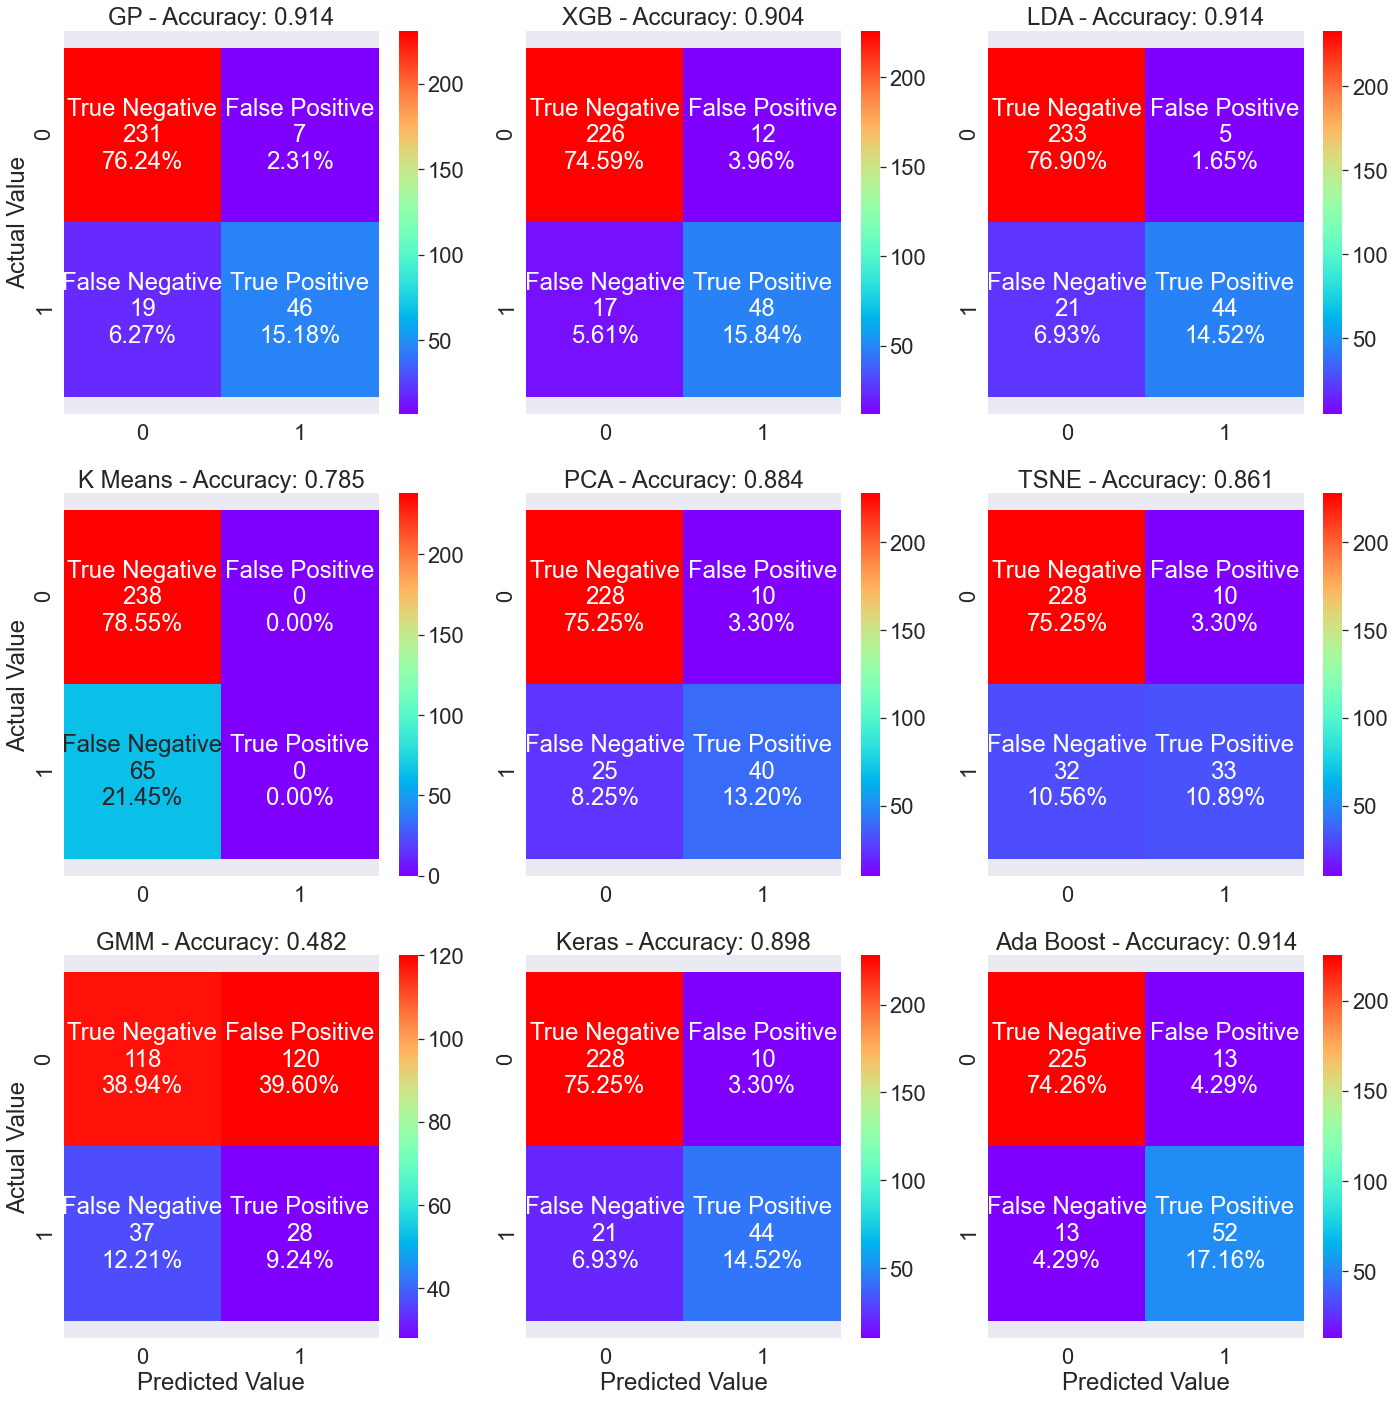

In [90]:
plt.figure(figsize = (20, 20))

plt.subplot(331)

cm_test10 = confusion_matrix(y_test, yHat_test10)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test10.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test10.flatten()/np.sum(cm_test10)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test10, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("GP - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test10)))
#plt.xlabel('Predicted Value')               
plt.ylabel('Actual Value')

plt.subplot(332)

cm_test11 = confusion_matrix(y_test, yHat_test11)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test11.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test11.flatten()/np.sum(cm_test11)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test11, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("XGB - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test11)))
#plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(333)

cm_test12 = confusion_matrix(y_test, yHat_test12)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test12.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test12.flatten()/np.sum(cm_test12)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test12, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("LDA - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test12)))
#plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(334)

cm_test13 = confusion_matrix(y_test, yHat_test13)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test13.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test13.flatten()/np.sum(cm_test13)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test13, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("K Means - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test13)))
#plt.xlabel('Predicted Value')               
plt.ylabel('Actual Value')

plt.subplot(335)

cm_test14 = confusion_matrix(y_test, yHat_test14)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test14.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test14.flatten()/np.sum(cm_test14)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test14, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("PCA - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test14)))
#plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(336)

cm_test15 = confusion_matrix(y_test, yHat_test15)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test15.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test15.flatten()/np.sum(cm_test15)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test15, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("TSNE - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test15)))
#plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(337)

cm_test16 = confusion_matrix(y_test, yHat_test16)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test16.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test16.flatten()/np.sum(cm_test16)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test16, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("GMM - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test16)))
plt.xlabel('Predicted Value')               
plt.ylabel('Actual Value')

plt.subplot(338)

cm_test17 = confusion_matrix(y_test, yHat_classes)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test17.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test17.flatten()/np.sum(cm_test17)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test17, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("Keras - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_classes)))
plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.subplot(339)

cm_test18 = confusion_matrix(y_test, yHat_test18)
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test18.flatten()]               
group_percentages = ["{0:.2%}".format(value) for value in cm_test18.flatten()/np.sum(cm_test18)]                
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]               
labels = np.asarray(labels).reshape(2,2)
sb.set(font_scale = 2)               
ax = sb.heatmap(cm_test18, annot = labels, fmt = "", cmap = "rainbow")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .1, top - .1)
plt.title("Ada Boost - Accuracy: {0:.3f}".format(accuracy_score(y_test, yHat_test18)))
plt.xlabel('Predicted Value')               
#plt.ylabel('Actual Value')

plt.tight_layout()
plt.show()

In [91]:
# How often is the classifier correct?

print('LG1:', accuracy_score(y_test, yHat_test1))
print()
print('LG2:', accuracy_score(y_test, yHat_test2))
print()
print('KNN:', accuracy_score(y_test, yHat_test3))
print()
print('TREE Entropy:', accuracy_score(y_test, yHat_test4))
print()
print('TREE Gini:', accuracy_score(y_test, yHat_test5))
print()
print('RF Entropy:', accuracy_score(y_test, yHat_test6))
print()
print('RF Gini:', accuracy_score(y_test, yHat_test7))
print()
print('GNB:', accuracy_score(y_test, yHat_test8))
print()
print('SVM:', accuracy_score(y_test, yHat_test9))
print()
print('GP:', accuracy_score(y_test, yHat_test10))
print()
print('XGB:', accuracy_score(y_test, yHat_test11))
print()
print('LDA:', accuracy_score(y_test, yHat_test12))
print()
print('KMeans:', accuracy_score(y_test, yHat_test13))
print()
print('PCA:', accuracy_score(y_test, yHat_test14))
print()
print('TSNE:', accuracy_score(y_test, yHat_test15))
print()
print('GMM:', accuracy_score(y_test, yHat_test16))
print()
print('Keras:', accuracy_score(y_test, yHat_classes))
print()
print('DBSCAN:', accuracy_score(y_test, yHat_test17))
print()
print('Ada Boost:', accuracy_score(y_test, yHat_test18))

LG1: 0.9306930693069307

LG2: 0.9207920792079208

KNN: 0.9207920792079208

TREE Entropy: 0.9240924092409241

TREE Gini: 0.8811881188118812

RF Entropy: 0.9207920792079208

RF Gini: 0.8910891089108911

GNB: 0.8910891089108911

SVM: 0.9240924092409241

GP: 0.9141914191419142

XGB: 0.9042904290429042

LDA: 0.9141914191419142

KMeans: 0.7854785478547854

PCA: 0.8844884488448845

TSNE: 0.8613861386138614

GMM: 0.48184818481848185

Keras: 0.8976897689768977

DBSCAN: 0.48184818481848185

Ada Boost: 0.9141914191419142


In [92]:
acc = [[0.9306930693069307, 0.9207920792079208, 0.9207920792079208, 0.9240924092409241, 
        0.8811881188118812, 0.9207920792079208, 0.8910891089108911, 0.8910891089108911, 
        0.9240924092409241, 0.9141914191419142, 0.9042904290429042, 0.9141914191419142, 
        0.7854785478547854, 0.8844884488448845, 0.8613861386138614, 0.48184818481848185, 
        0.8976897689768977, 0.48184818481848185, 0.9141914191419142]]

subj = ['LG1', 'LG2', 'KNN', 'TREE Entropy', 'TREE Gini', 'RF Entropy', 'RF Gini', 'GNB', 'SVM', 'GP', 
        'XGB', 'LDA', 'KMeans', 'PCA', 'TSNE', 'GMM', 'Keras', 'DBSCAN', 'AdaBoost']

Accuracy = pd.DataFrame(acc, columns = subj)

Accuracy

,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF Entropy,RF Gini,GNB,SVM,GP,XGB,LDA,KMeans,PCA,TSNE,GMM,Keras,DBSCAN,AdaBoost
0,0.930693,0.920792,0.920792,0.924092,0.881188,0.920792,0.891089,0.891089,0.924092,0.914191,0.90429,0.914191,0.785479,0.884488,0.861386,0.481848,0.89769,0.481848,0.914191


### prediction

In [93]:
df.columns

Index(['RS', 'RA', 'OBP', 'SLG', 'BA', 'League_NL', 'Playoffs', 'W'], dtype='object')

In [94]:
Data = [[600, 650, 0.314, 0.349, 0.239, 0, 75], 
        [650, 800, 0.324, 0.359, 0.249, 1, 80], 
        [700, 750, 0.334, 0.369, 0.259, 1, 82],
        [750, 850, 0.344, 0.379, 0.269, 0, 79], 
        [800, 700, 0.354, 0.389, 0.279, 1, 83], 
        [850, 750, 0.364, 0.399, 0.289, 1, 85],
        [900, 700, 0.374, 0.409, 0.299, 0, 89], 
        [950, 750, 0.384, 0.419, 0.299, 1, 92], 
        [1050, 800, 0.394, 0.429, 0.319, 1, 90]]

column = ['RS', 'RA', 'OBP', 'SLG', 'BA', 'League_NL', 'W']

new_Data1 = pd.DataFrame(Data, columns = column)

new_Data1

,RS,RA,OBP,SLG,BA,League_NL,W
0,600,650,0.314,0.349,0.239,0,75
1,650,800,0.324,0.359,0.249,1,80
2,700,750,0.334,0.369,0.259,1,82
3,750,850,0.344,0.379,0.269,0,79
4,800,700,0.354,0.389,0.279,1,83
5,850,750,0.364,0.399,0.289,1,85
6,900,700,0.374,0.409,0.299,0,89
7,950,750,0.384,0.419,0.299,1,92
8,1050,800,0.394,0.429,0.319,1,90


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

lg_model1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lg_model1.fit(X_train, y_train)

new_Data_lg1 = SS.fit_transform(new_Data1)

prediction_lg1 = lg_model1.predict(new_Data_lg1)

prediction_lg1

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [96]:
new_Data = new_Data1.copy()

new_Data['LG1'] = prediction_lg1

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1
0,600,650,0.314,0.349,0.239,0,75,0
1,650,800,0.324,0.359,0.249,1,80,0
2,700,750,0.334,0.369,0.259,1,82,0
3,750,850,0.344,0.379,0.269,0,79,0
4,800,700,0.354,0.389,0.279,1,83,0
5,850,750,0.364,0.399,0.289,1,85,0
6,900,700,0.374,0.409,0.299,0,89,1
7,950,750,0.384,0.419,0.299,1,92,1
8,1050,800,0.394,0.429,0.319,1,90,1


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

lg_model2 = LogisticRegression(penalty = 'l2', solver = 'lbfgs')

lg_model2.fit(X_train, y_train)

new_Data_lg2 = SS.fit_transform(new_Data1)

prediction_lg2 = lg_model2.predict(new_Data_lg2)

prediction_lg2

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [98]:
new_Data['LG2'] = prediction_lg2

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2
0,600,650,0.314,0.349,0.239,0,75,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors = 7)

knn_model.fit(X_train,y_train)

new_Data_knn = SS.fit_transform(new_Data1)

prediction_knn = knn_model.predict(new_Data_knn)

prediction_knn

array([0, 0, 0, 0, 0, 1, 1, 1, 1])

In [100]:
new_Data['KNN'] = prediction_knn

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN
0,600,650,0.314,0.349,0.239,0,75,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1
6,900,700,0.374,0.409,0.299,0,89,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

tree_model1 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, 
                                          random_state = 2021)

tree_model1.fit(X_train, y_train)

new_Data_tree1 = SS.fit_transform(new_Data1)

prediction_tree1 = tree_model1.predict(new_Data_tree1)

prediction_tree1

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [102]:
new_Data['TREE Entropy'] = prediction_tree1

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

tree_model2 = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 5, 
                                          random_state = 2021)

tree_model2.fit(X_train, y_train)

new_Data_tree2 = SS.fit_transform(new_Data1)

prediction_tree2 = tree_model2.predict(new_Data_tree2)

prediction_tree2

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [104]:
new_Data['TREE Gini'] = prediction_tree2

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1


In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

rf_model1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', 
                                   random_state = 2021)

rf_model1.fit(X_train, y_train)

new_Data_rf1 = SS.fit_transform(new_Data1)

prediction_rf1 = rf_model1.predict(new_Data_rf1)

prediction_rf1

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [106]:
new_Data['RF1'] = prediction_rf1

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

rf_model2 = RandomForestClassifier(n_estimators = 10, criterion = 'gini', 
                                   random_state = 2021)

rf_model2.fit(X_train, y_train)

new_Data_rf2 = SS.fit_transform(new_Data1)

prediction_rf2 = rf_model2.predict(new_Data_rf2)

prediction_rf2

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [108]:
new_Data['RF2'] = prediction_rf2

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

gnb_model = GaussianNB()

gnb_model.fit(X_train, y_train)

new_Data_gnb = SS.fit_transform(new_Data1)

prediction_gnb = gnb_model.predict(new_Data_gnb)

prediction_gnb

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [110]:
new_Data['GNB'] = prediction_gnb

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

svc_model = SVC(kernel = 'linear', random_state = 2021)

svc_model.fit(X_train, y_train)

new_Data_svc = SS.fit_transform(new_Data1)

prediction_svc = svc_model.predict(new_Data_svc)

prediction_svc

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [112]:
new_Data['SVM'] = prediction_svc

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

gp_model = GaussianProcessClassifier()

gp_model.fit(X_train, y_train)

new_Data_gp = SS.fit_transform(new_Data1)

prediction_gp = gp_model.predict(new_Data_gp)

prediction_gp

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [114]:
new_Data['GP'] = prediction_gp

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

new_Data_xgb = SS.fit_transform(new_Data1)

prediction_xgb = xgb_model.predict(new_Data_xgb)

prediction_xgb

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [116]:
new_Data['XGB'] = prediction_xgb

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP,XGB
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1,1


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

from sklearn.preprocessing import StandardScaler 

SS = StandardScaler() 

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()

new_Data_lda = SS.fit_transform(new_Data1)

lda_model.fit(X_train, y_train)

prediction_lda = lda_model.predict(new_Data_lda)

prediction_lda

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [118]:
new_Data['LDA'] = prediction_lda

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP,XGB,LDA
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1,1,1


In [119]:
# unsupervised learning

X = df_out2.iloc[:, : -1].values

y = df_out2.iloc[:, -1].values

km_model = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, 
                  random_state = 2021)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

X_train = SS.fit_transform(X_train)  

# using Support Vector Machine

km_model.fit(X_train)

new_Data_km = SS.fit_transform(new_Data1)

prediction_km = km_model.predict(new_Data_km)

prediction_km

array([0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [120]:
new_Data['KMeans'] = prediction_km

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP,XGB,LDA,KMeans
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0,0,0,1
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0,0,0,1
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1,1,1,1


In [121]:
X = df_out2.iloc[:, : -1].values

y = df_out2.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, 
                                                    random_state = 2021)

X_train = SS.fit_transform(X_train) 

X_test = SS.transform(X_test)

new_Data_pca = SS.fit_transform(new_Data1)

pca_model = PCA(n_components = 2)

X_train = pca_model.fit_transform(X_train)

X_test = pca_model.transform(X_test)

new_Data_pca = pca_model.transform(new_Data_pca)

# using Support Vector Machine

svc_model.fit(X_train, y_train)

prediction_pca = svc_model.predict(new_Data_pca)

prediction_pca

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [122]:
new_Data['PCA'] = prediction_pca

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP,XGB,LDA,KMeans,PCA
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [123]:
X = df_out2.iloc[:, : -1].values

y = df_out2.iloc[:, -1].values

tsne = TSNE(n_components = 2, perplexity = 50)

X_reduced = tsne.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state = 2021)

X_train = SS.fit_transform(X_train)

X_test = SS.transform(X_test)

new_Data_tsne = SS.fit_transform(new_Data1)

new_Data_tsne = tsne.fit_transform(new_Data_tsne)

# using Support Vector Machine

svc_model.fit(X_train, y_train)

prediction_tsne = svc_model.predict(new_Data_tsne)

prediction_tsne

array([0, 0, 0, 0, 1, 1, 0, 0, 0])

In [124]:
new_Data['TSNE'] = prediction_tsne

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP,XGB,LDA,KMeans,PCA,TSNE
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [125]:
X = df_out2.iloc[:, : -1].values

y = df_out2.iloc[:, -1].values

gm = GaussianMixture(n_components = 2, covariance_type = 'full')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2021)

X_train = SS.fit_transform(X_train)  

gm.fit(X_train)

new_Data_gm = SS.fit_transform(new_Data1)

prediction_gm = gm.predict(new_Data_gm)

prediction_gm

array([0, 1, 1, 0, 1, 1, 1, 1, 1])

In [126]:
new_Data['GMM'] = prediction_gm

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP,XGB,LDA,KMeans,PCA,TSNE,GMM
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1


In [127]:
new_Data_keras = SS.fit_transform(new_Data1)

prediction_keras = keras_model.predict_classes(new_Data_keras)

prediction_keras

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [128]:
new_Data['Keras'] = prediction_keras

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP,XGB,LDA,KMeans,PCA,TSNE,GMM,Keras
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [131]:
new_Data_ada = SS.fit_transform(new_Data1)

prediction_ada = ada.predict(new_Data_ada)

prediction_ada

array([0, 0, 0, 0, 0, 0, 1, 1, 1])

In [133]:
new_Data['AdaBoost'] = prediction_ada

new_Data

,RS,RA,OBP,SLG,BA,League_NL,W,LG1,LG2,KNN,TREE Entropy,TREE Gini,RF1,RF2,GNB,SVM,GP,XGB,LDA,KMeans,PCA,TSNE,GMM,Keras,AdaBoost
0,600,650,0.314,0.349,0.239,0,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,650,800,0.324,0.359,0.249,1,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,700,750,0.334,0.369,0.259,1,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,750,850,0.344,0.379,0.269,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,800,700,0.354,0.389,0.279,1,83,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
5,850,750,0.364,0.399,0.289,1,85,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
6,900,700,0.374,0.409,0.299,0,89,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
7,950,750,0.384,0.419,0.299,1,92,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
8,1050,800,0.394,0.429,0.319,1,90,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
